# New registrations of electric vehicles in Europe

In [2]:
import pandas as pd
ev_data = pd.read_csv('new-electric-vehicles-in-eu-3.csv')
print(ev_data.head())

   Year:text  Battery electric cars:number  Plug-in electric cars:number  \
0       2010                           591                           NaN   
1       2011                          7179                           NaN   
2       2012                         13730                        6225.0   
3       2013                         21454                       31079.0   
4       2014                         31197                       60370.0   

   Total cars:number  Share of electric cars:number  
0           11128785                            0.0  
1           10498868                            0.1  
2            9369664                            0.2  
3            9573937                            0.5  
4           10075476                            0.9  


This data is based on the EV population in the European Union from  the early 2000's to 2022. Now, let’s clean the dataset 

In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year:text                      13 non-null     int64  
 1   Battery electric cars:number   13 non-null     int64  
 2   Plug-in electric cars:number   11 non-null     float64
 3   Total cars:number              13 non-null     int64  
 4   Share of electric cars:number  13 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 652.0 bytes


In [4]:
ev_data.isnull().sum()

Year:text                        0
Battery electric cars:number     0
Plug-in electric cars:number     2
Total cars:number                0
Share of electric cars:number    0
dtype: int64

In [5]:
ev_data = ev_data.dropna()

In [6]:
# Check the column names in the DataFrame 
print(ev_data.columns)

Index(['Year:text', 'Battery electric cars:number',
       'Plug-in electric cars:number', 'Total cars:number',
       'Share of electric cars:number'],
      dtype='object')


 Let's visualize EV adoption over time - New registrations of electric cars
> - Battery electric cars.
> - Plug-in electric cars.
> - Share of electric cars.

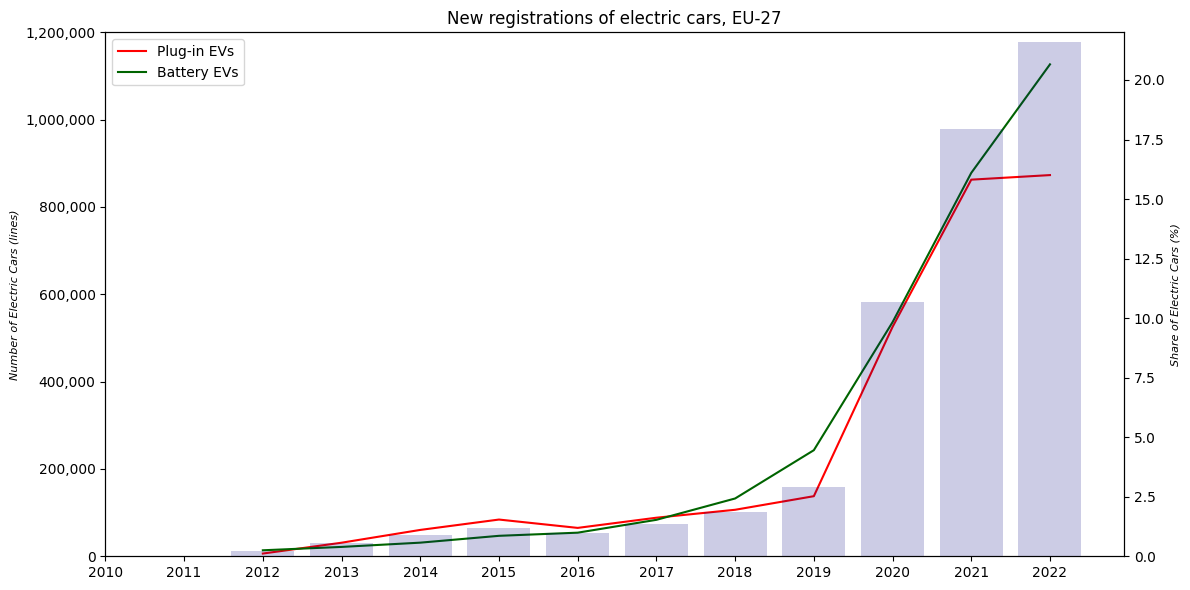

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Grouping the data 
ev_adoption_by_year = ev_data.groupby('Year:text').agg({
    'Plug-in electric cars:number': 'sum',
    'Battery electric cars:number': 'sum',
    'Total cars:number': 'sum'
}).reset_index()

# Calculate the share of electric cars
ev_adoption_by_year['Share of electric cars:number'] = (
    (ev_adoption_by_year['Plug-in electric cars:number'] + ev_adoption_by_year['Battery electric cars:number'])
    / ev_adoption_by_year['Total cars:number']) * 100

# Plotting 
fig, ax1 = plt.subplots(figsize=(12, 6))  # Create the figure and the first axes

# Create a second y-axis (ax2) for the share of electric cars
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis

# Bar plot on the second y-axis (ax2) using plt
ax2.bar(ev_adoption_by_year['Year:text'], ev_adoption_by_year['Share of electric cars:number'], color='navy', alpha=0.2)

# # Format y-axis for ax2
ax2.set_ylim(0, 22)  
ax2.set_ylabel('Share of Electric Cars (%)', fontsize=8, fontstyle='italic')

# Line plot for Plug-in EVs and Battery EVs on the first y-axis (ax1)
ax1.plot(ev_adoption_by_year['Year:text'], ev_adoption_by_year['Plug-in electric cars:number'], color='red', marker='', label='Plug-in EVs')
ax1.plot(ev_adoption_by_year['Year:text'], ev_adoption_by_year['Battery electric cars:number'], color='darkgreen', marker='', label='Battery EVs')

# Format y-axis for ax1
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax1.set_ylabel('Number of Electric Cars (lines)', fontsize=8, fontstyle='italic')  # Set label for the first y-axis
ax1.set_ylim(0, 1200000)

# Add title and label for x-axis
plt.title('New registrations of electric cars, EU-27')
plt.xlabel('Year')
plt.xticks(range(2010, 2023))


# Legend placement
ax1.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


Considerable progress in the uptake of electric cars and vans in the EU was made in 2022, with 21.6% of new car registrations being electric vehicles. in 2022, the number of newly registered battery electric vehicles increased while the number of plug-in hybrid cars remained stable.

# Newly registered electric cars by country

In [8]:
ev_data_by_country = pd.read_csv('FIG2-257004-TERM034-v3_Data.csv')
print(ev_data_by_country.head())

  Row Labels  ELECTRIC  Plug-in Hybrid  BEV [%]  PHEV [%]
0         SE     97696           64719   0.3503    0.2320
1         IS      5546            3730   0.3358    0.2258
2         FI     14517           16155   0.1827    0.2034
3         MT       847            1150   0.1367    0.1856
4         DK     30418           23811   0.2117    0.1657


In [9]:
ev_data_by_country.info

<bound method DataFrame.info of    Row Labels  ELECTRIC  Plug-in Hybrid  BEV [%]  PHEV [%]
0          SE     97696           64719   0.3503    0.2320
1          IS      5546            3730   0.3358    0.2258
2          FI     14517           16155   0.1827    0.2034
3          MT       847            1150   0.1367    0.1856
4          DK     30418           23811   0.2117    0.1657
5          BE     37626           59290   0.1027    0.1618
6          DE    465341          358643   0.1825    0.1406
7          NL     71166           34251   0.2339    0.1126
8          PT     17957           16086   0.1155    0.1035
9          LU      6377            3566   0.1657    0.0927
10         NO    137744           16046   0.7939    0.0925
11         IE     15725            8805   0.1491    0.0835
12         FR    210367          128659   0.1284    0.0785
13         CH     40507           17812   0.1766    0.0776
14         AT     34141           13247   0.1594    0.0618
15         ES     31785 

In [10]:
ev_data_by_country.isnull().sum()

Row Labels        0
ELECTRIC          0
Plug-in Hybrid    0
BEV [%]           0
PHEV [%]          0
dtype: int64

Let's visualize Newly registered electric cars by country
> - Battery electric cars.
> - Plug-in electric cars.
> - Share of electric cars.

In [11]:
# Set the country as index 
ev_data_by_country.set_index('Row Labels', inplace=True)

# Create a mapping of abbreviations to full names
country_mapping = {
    'SE': 'Sweden', 'IS': 'Iceland', 'FI': 'Finland', 'MT': 'Malta', 'DK': 'Denmark',
    'BE': 'Belgium', 'DE': 'Germany', 'NL': 'Netherlands', 'PT': 'Portugal', 'LU': 'Luxembourg',
    'NO': 'Norway', 'IE': 'Ireland', 'FR': 'France', 'CH': 'Switzerland', 'AT': 'Austria',
    'ES': 'Spain', 'GR': 'Greece', 'IT': 'Italy', 'HU': 'Hungary', 'RO': 'Romania',
    'BG': 'Bulgaria', 'LT': 'Lithuania', 'HR': 'Croatia', 'CZ': 'Czech Republic',
    'PL': 'Poland', 'LV': 'Latvia', 'EE': 'Estonia', 'CY': 'Cyprus', 'SI': 'Slovenia',
    'SK': 'Slovakia'
}

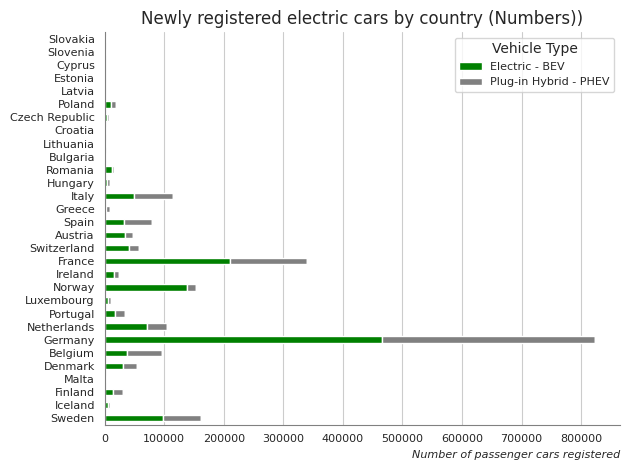

In [14]:
# New EV registrations by country per number of passenger cars registered
import numpy as np
import seaborn as sns
sns.set_style('white')
colors = ['green', 'grey'] 
ax=ev_data_by_country.plot(kind='barh', stacked=True, color=colors)
plt.grid(axis="x")
plt.title('Newly registered electric cars by country (Numbers))')
plt.xlabel('Number of passenger cars registered', fontsize=8, fontstyle='italic', loc='right')
plt.ylabel('')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
ax.set_yticks(range(len(country_mapping)))
ax.set_yticklabels([country_mapping[code] for code in ev_data_by_country.index])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('grey')

plt.legend(['Electric - BEV', 'Plug-in Hybrid - PHEV'], title='Vehicle Type', fontsize=8)
plt.tight_layout()
plt.show()


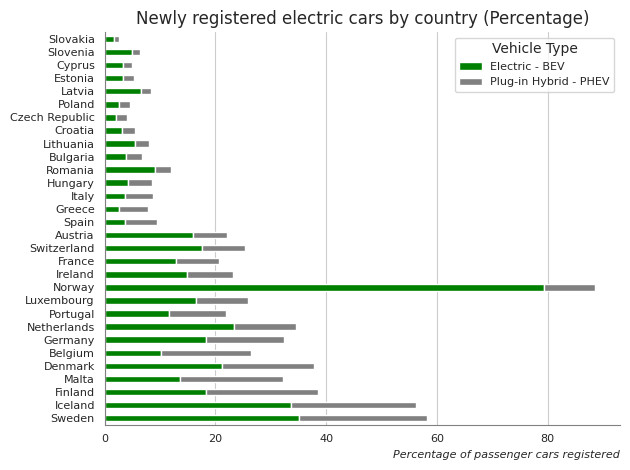

In [13]:
# Convert percentages to whole numbers
ev_data_by_country['BEV [%]'] = ev_data_by_country['BEV [%]'] *100
ev_data_by_country['PHEV [%]'] = ev_data_by_country['PHEV [%]'] *100

# New EV registrations by country per percentage of passenger cars registered
sns.set_style('white')
colors = ['green', 'grey']
ax = ev_data_by_country[['BEV [%]', 'PHEV [%]']].plot(kind='barh', stacked=True, color=colors)
plt.grid(axis="x")
plt.title('Newly registered electric cars by country (Percentage)')
plt.xlabel('Percentage of passenger cars registered', fontsize=8, fontstyle='italic', loc='right')
plt.ylabel('')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.set_yticks(range(len(country_mapping)))
ax.set_yticklabels([country_mapping[code] for code in ev_data_by_country.index])
plt.legend(['Electric - BEV', 'Plug-in Hybrid - PHEV'], title='Vehicle Type', fontsize=8)
plt.tight_layout()
plt.show()


<h2><u> Observation :</u></h2>
In 2022, the share of electric vehicles in new car registrations increased in almost all countries (EU-27, Iceland, Norway) compared with 2021. The highest shares were found in Norway (89%), Sweden (58%) and Iceland (56%).

Germany, France and Norway together accounted for about 64% of all new BEV registrations among the EU-27 and non-EU EEA countries. Norway had the highest number of new BEVs registered in 2022, accounting for 79% of new car sales. PHEV percentage sales were highest in Iceland, Sweden (both 23%) and Finland (20%).

In four European countries, the percentage of EV registrations remained lower than 5% of the total fleet (Cyprus, Poland, Czech Republic and Slovakia).

<small>*Source : European Environment Agency (EEA) - https://www.eea.europa.eu/en/analysis/maps-and-charts/new-electric-vehicles-by-country-2/data-package.zip*</small>